## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
%matplotlib notebook
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combinedmousedf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')
combinedmousedf.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#get DataFrame of needed columns
summarystatdf=combinedmousedf[['Drug Regimen', 'Tumor Volume (mm3)']]

#get mean by regiman
groupedregimanmean= summarystatdf.groupby(['Drug Regimen']).mean()


#get median by regiman
groupedregimanmedian= summarystatdf.groupby(['Drug Regimen']).median()
groupedregimanmedian

#get variance by regiman
groupedregimanvar=summarystatdf.groupby(['Drug Regimen']).var()
groupedregimanvar

#get standard deviation by regiman 
groupedregimanstd= summarystatdf.groupby(['Drug Regimen']).std()
groupedregimanstd

#get SEM by regiman
groupedregimansem= summarystatdf.groupby(['Drug Regimen']).sem()


#add columns to Data Frame
groupedregimanstd['Mean']=groupedregimanmean
groupedregimanstd['Median']= groupedregimanmedian
groupedregimanstd['Variance']= groupedregimanvar
groupedregimanstd['SEM']= groupedregimansem

#rename column
groupedregimanstdrenamed=groupedregimanstd.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
groupedregimanstdrenamed




,Standard Deviation,Mean,Median,Variance,SEM
Drug Regimen,,,,,
Capomulin,4.994774,40.675741,41.557809,24.947764,0.329346
Ceftamin,6.268188,52.591172,51.776157,39.290177,0.469821
Infubinol,6.567243,52.884795,51.820584,43.128684,0.492236
Ketapril,8.279709,55.235638,53.698743,68.553577,0.603860
Naftisol,8.134708,54.331565,52.509285,66.173479,0.596466
Placebo,7.821003,54.033581,52.288934,61.168083,0.581331
Propriva,6.507770,52.322552,50.854632,42.351070,0.512884
Ramicane,4.846308,40.216745,40.673236,23.486704,0.320955
Stelasyn,7.710419,54.233149,52.431737,59.450562,0.573111


## Bar plots

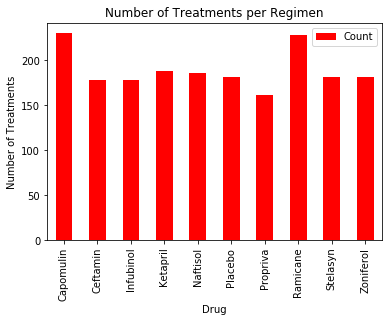

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#number of data points using count() on previous summarystatdf 
groupedregiman= summarystatdf.groupby(['Drug Regimen'])
groupedregiman2=groupedregiman.count()

groupedregiman2renamed=groupedregiman2.rename(columns={"Tumor Volume (mm3)":"Count"})


groupedregiman2renamed.plot(kind="bar", facecolor="red")

plt.title("Number of Treatments per Regimen")
plt.ylabel("Number of Treatments")
plt.xlabel("Drug")
plt.show()

plt.tight_layout()


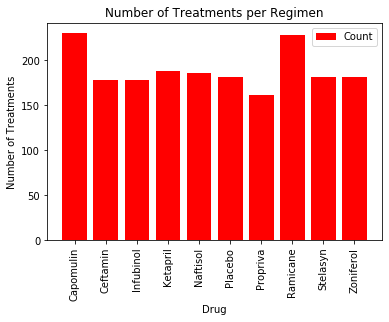

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#values for x axis
drug=list(groupedregiman2renamed.index.values) 
#values for y axis
count = groupedregiman2renamed['Count'].tolist()

x_axis = np.arange(len(drug))

plt.bar(x_axis, count, color="r", align="center", label= "Count")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation='vertical')


plt.title("Number of Treatments per Regimen")
plt.ylabel("Number of Treatments")
plt.xlabel("Drug")
plt.legend(loc="upper right")
plt.show()


## Pie plots

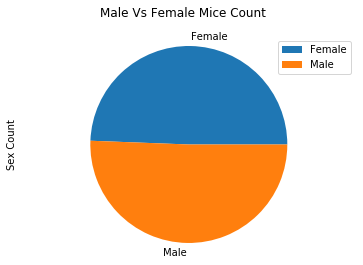

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#get DataFrame that counts male and female mice
groupedsexdf=combinedmousedf[['Sex','Drug Regimen']]

#rename Drug Regimen
groupedsexdf2= groupedsexdf.rename(columns={"Drug Regimen":"Sex Count"})

#group by sex
groupedsexdf3= groupedsexdf2.groupby(['Sex'])

#apply count function for sex and save as new dataframe
xdf= groupedsexdf3.count()


sexpie = xdf.plot(kind="pie", subplots=True, title="Male Vs Female Mice Count")

plt.axis("equal")
plt.show()






(-1.1045613723658971,
 1.1002172082078998,
 -1.1027130801595115,
 1.105172849624489)

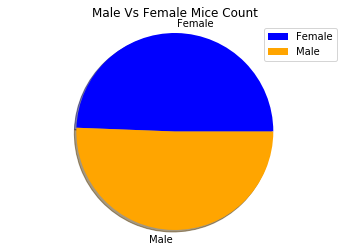

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
sex=list(xdf.index.values) 


#values for y axis
count = xdf['Sex Count'].tolist()

#The colors of each section of the pie chart
colors = ["blue", "orange"]

plt.pie(count, labels=sex, colors=colors,
        shadow=True)

plt.title("Male Vs Female Mice Count")
plt.legend(loc="upper right")

plt.axis("equal")


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#filter by four drugs
drugfiltereddf= combinedmousedf.loc[(combinedmousedf["Drug Regimen"] == 'Capomulin')  | (combinedmousedf["Drug Regimen"] == 'Ramicane')  | (combinedmousedf["Drug Regimen"] == 'Infubinol')  | (combinedmousedf["Drug Regimen"] == 'Ceftamin')]

#group by Mouse ID and Drug
groupbygroupby= drugfiltereddf.groupby(['Mouse ID', 'Drug Regimen'])

#get last value in each group, which is final tumor volume, saved in new dataframe
zyz= groupbygroupby.last()

#Capomulin results only in DataFrame
capzyz=zyz.filter(like='Cap', axis=0)




#quartiles for Capomulin
capquartiles = capzyz['Tumor Volume (mm3)'].quantile([.25,.5,.75])

caplowerq = capquartiles[0.25]
capupperq = capquartiles[0.75]
capiqr = capupperq-caplowerq
caplower_bound = caplowerq - (1.5*capiqr)
capupper_bound = capupperq + (1.5*capiqr)

print("Capomulin data")
print(f"The lower quartile of tumor volume is: {caplowerq}")
print(f"The upper quartile of tumor volume is: {capupperq}")
print(f"The interquartile range of tumor volume is: {capiqr}")
print(f"The the median of tumor volume is: {capquartiles[0.5]} ")

caplower_bound = caplowerq - (1.5*capiqr)
capupper_bound = capupperq + (1.5*capiqr)
print(f"Values below {caplower_bound} could be outliers.")
print(f"Values above {capupper_bound} could be outliers.")



print('--------------------')

#Ramicane results only in DataFrame
ramzyz=zyz.filter(like='Ramicane', axis=0)




#quartiles for Ramicane
ramquartiles =ramzyz['Tumor Volume (mm3)'].quantile([.25,.5,.75])

ramlowerq = ramquartiles[0.25]
ramupperq = ramquartiles[0.75]
ramiqr = ramupperq-ramlowerq
ramlower_bound = ramlowerq - (1.5*ramiqr)
ramupper_bound = ramupperq + (1.5*ramiqr)

print("Ramicane data")
print(f"The lower quartile of tumor volume is: {ramlowerq}")
print(f"The upper quartile of tumor volume is: {ramupperq}")
print(f"The interquartile range of tumor volume is: {ramiqr}")
print(f"The the median of tumor volume is: {ramquartiles[0.5]} ")

ramlower_bound = ramlowerq - (1.5*ramiqr)
ramupper_bound = ramupperq + (1.5*ramiqr)
print(f"Values below {ramlower_bound} could be outliers.")
print(f"Values above {ramupper_bound} could be outliers.")


print('--------------------')

#Infubinol results only in DataFrame
infzyz=zyz.filter(like='Infubinol', axis=0)


#quartiles for Infubinol
infquartiles =infzyz['Tumor Volume (mm3)'].quantile([.25,.5,.75])

inflowerq = infquartiles[0.25]
infupperq = infquartiles[0.75]
infiqr = infupperq-inflowerq
inflower_bound = inflowerq - (1.5*infiqr)
infupper_bound = infupperq + (1.5*infiqr)

print("Infubinol data")
print(f"The lower quartile of tumor volume is: {inflowerq}")
print(f"The upper quartile of tumor volume is: {infupperq}")
print(f"The interquartile range of tumor volume is: {infiqr}")
print(f"The the median of tumor volume is: {infquartiles[0.5]} ")

inflower_bound = inflowerq - (1.5*infiqr)
infupper_bound = infupperq + (1.5*infiqr)
print(f"Values below {inflower_bound} could be outliers.")
print(f"Values above {infupper_bound} could be outliers.")
outlierinf = infzyz.loc[(infzyz['Tumor Volume (mm3)'] < inflower_bound) | (infzyz['Tumor Volume (mm3)'] > infupper_bound)]
print(outlierinf)

print('--------------------')

#Ceftamin results only in DataFrame
cefzyz=zyz.filter(like='Ceftamin', axis=0)


#quartiles for Ceftamin
cefquartiles =cefzyz['Tumor Volume (mm3)'].quantile([.25,.5,.75])

ceflowerq = cefquartiles[0.25]
cefupperq = cefquartiles[0.75]
cefiqr = cefupperq-ceflowerq
ceflower_bound = ceflowerq - (1.5*cefiqr)
cefupper_bound = cefupperq + (1.5*cefiqr)

print("Ceftamin data")
print(f"The lower quartile of tumor volume is: {ceflowerq}")
print(f"The upper quartile of tumor volume is: {cefupperq}")
print(f"The interquartile range of tumor volume is: {cefiqr}")
print(f"The the median of tumor volume is: {cefquartiles[0.5]} ")

inflower_bound = ceflowerq - (1.5*cefiqr)
infupper_bound = cefupperq + (1.5*cefiqr)
print(f"Values below {ceflower_bound} could be outliers.")
print(f"Values above {cefupper_bound} could be outliers.")




Capomulin data
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------
Ramicane data
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------
Infubinol data
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 c

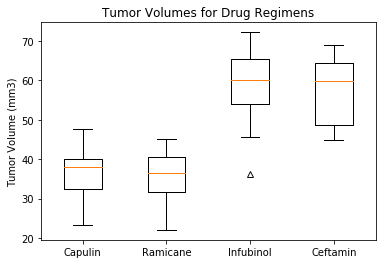

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#get Capomulin values
capvalues= capzyz['Tumor Volume (mm3)']

#get Ramicane values
ramvalues= ramzyz['Tumor Volume (mm3)']

#get Infubinol values
infvalues= infzyz['Tumor Volume (mm3)']

#get Ceftamin values
cefvalues= cefzyz['Tumor Volume (mm3)']

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes for Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
bp=ax1.boxplot([capvalues, ramvalues, infvalues, cefvalues])
for flier in bp['fliers']:
    flier.set(marker='^', color='#e7298a', alpha=15)
ax1.set_xticklabels(['Capulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()



## Line and scatter plots

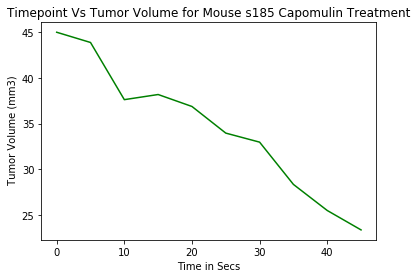

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#filter by Capomulin, get timepoint and tumor volume and Mouse ID columns
capfiltereddf= combinedmousedf.loc[(combinedmousedf["Drug Regimen"] == 'Capomulin')] 

newcapfiltereddf=capfiltereddf[['Mouse ID','Timepoint','Tumor Volume (mm3)']]

#filter by mouse ID s185 in new dataFrame

capfiltereddfmouse=newcapfiltereddf[capfiltereddf['Mouse ID']== 's185']

#get times as list
times=capfiltereddfmouse['Timepoint'].tolist()

#get average tumor values in list
tumorvalues = capfiltereddfmouse['Tumor Volume (mm3)'].tolist()

#plot line graph
plt.plot(times, tumorvalues, color="green")
plt.title("Timepoint Vs Tumor Volume for Mouse s185 Capomulin Treatment")
plt.ylabel(" Tumor Volume (mm3)")
plt.xlabel("Time in Secs")

plt.show()




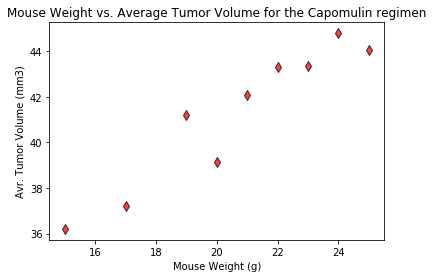

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#get only weight(g) and Tumor volume columns from filtered Capomulin dataFrame
weightcapfiltereddf= capfiltereddf[['Weight (g)','Tumor Volume (mm3)']]



#group by timepoints, get average tumor volume
weightcapfiltereddf= weightcapfiltereddf.groupby(['Weight (g)']).mean()
weightcapfiltereddf.head(20)

#values for x axis
weight=list(weightcapfiltereddf.index.values) 
#values for y axis
volume = weightcapfiltereddf['Tumor Volume (mm3)'].tolist()

plt.scatter(weight, volume, marker="d", facecolors="red", edgecolors="black",
            s=50, alpha=.75)

plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin regimen")
plt.ylabel("Avr. Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

plt.show()



The correlation between mouse weight and the average tumor volume for the Capomulin regimen is 0.95


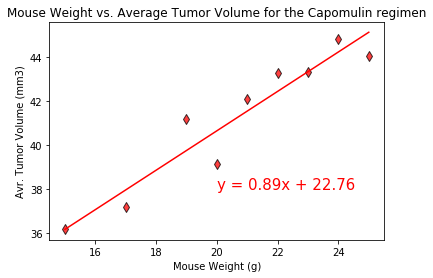

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume for the Capomulin regimen is {round(st.pearsonr(weight,volume)[0],2)}")


#values for x axis
weight=list(weightcapfiltereddf.index.values)
weight_array = np.array(weight)

#values for y axis
volume = weightcapfiltereddf['Tumor Volume (mm3)']   



(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_array, volume)





regress_values = weight_array * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight, volume, marker="d", facecolors="red", edgecolors="black",
            s=50, alpha=.75)


plt.plot(weight_array,regress_values,"r-")


plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin regimen")
plt.ylabel("Avr. Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")


plt.show()


Observations:  
1) There is a strong positive correlation between mouse weight and tumor volume. The higher the mouse weight, the bigger the tumor size, which makes sense as heavier massed beings would be expected to have bigger tumors  
2) There is an inverse relationship between time and tumor volume for mouse S185 undergoing the Capomulin Regimen. So, the more time that passes while the mouse is being treated with Capomulin, the smaller the tumor gets. This gives some evidence of the treatment being effective.  
3) Virtually the same number of male and female mice were used in the entire study, with male mice slightly edging out female mice.